<a href="https://colab.research.google.com/github/muresan-gabriel/graph-repo/blob/main/introducere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Minimal

In [16]:
from graphviz import Digraph
!pip install python-dotenv
!apt install libgraphviz-dev
!pip install pygraphviz

import networkx as nx
nx_graph = nx.Graph()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgraphviz-dev is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [47]:
nodes = [1, 2, 3]

nx_graph.add_nodes_from([
    (4, { "color": "red" }),
    (5, { "color": "green" }),
])

path = nx.path_graph(10)
nx_graph.add_nodes_from(path)

nx_graph.add_node(path)

nx_graph.add_edge(1, 2)
e = (2, 3)
nx_graph.add_edge(*e)
nx_graph.add_edges_from([(1, 2), (1, 3)])

nx_graph.add_edges_from(path.edges)

# print(nx_graph)
# print(path.edges)

nx_graph.add_edges_from([(1, 2), (1, 3)])
nx_graph.add_node(1)
nx_graph.add_edge(1, 2)
nx_graph.add_node("spam")
nx_graph.add_nodes_from("spam")
nx_graph.add_edge(3, 'm')

nx_graph.number_of_nodes()
nx_graph.number_of_edges()

nx_di_graph = nx.DiGraph()
nx_di_graph.add_edge(2, 1)
nx_di_graph.add_edge(1, 3)
nx_di_graph.add_edge(2, 4)
nx_di_graph.add_edge(1, 2)

assert list(nx_di_graph.successors(2)) == [1, 4]
assert list(nx_di_graph.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)]

list(nx_graph.nodes)
list(nx_graph.edges)
list(nx_graph.adj[1])
nx_graph.degree[1]

nx_graph.edges([2, 'm'])
nx_graph.degree([2, 3])

# ------------------------------------------------

nx_graph.remove_node(1)
nx_graph.remove_nodes_from("spam")
list(nx_graph.nodes)
nx_graph.remove_edge(2 , 3)
print(nx_graph)

Graph with 13 nodes and 6 edges


In [42]:
nx_graph.add_edge(1, 2)
path = nx.DiGraph(nx_graph)
list(path.edges())
edgeList = [(0, 1), (1, 2), (2, 3)]
path = nx.Graph(edgeList)
list(path.edges())
adjacency_dict = {0: (1, 2), 1: (0, 2), 2: (0, 1)}

path = nx.Graph(adjacency_dict)
list(path.edges())

[(0, 1), (0, 2), (1, 2)]

In [40]:
nx_graph = nx.Graph([(1, 2, { "color": "yellow" })])
nx_graph[1]
nx_graph[1][2]
nx_graph.edges[1, 2]

{'color': 'yellow'}

In [38]:
nx_graph.add_edge(1, 3)
nx_graph[1][3]['color'] = "blue"
nx_graph.edges[1, 2]['color'] = "red"
nx_graph.edges[1, 2]

{'color': 'red'}

In [36]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
  for nbr, eattr in nbrs.items():
    wt = eattr['weight']
    if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [34]:
for (u, v, wt) in FG.edges.data('weight'):
  if wt < 0.5:
    print(f"({u}, {v}, {wt:.3})")

(1, 2, 0.125)
(3, 4, 0.375)


In [48]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

In [49]:
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

In [50]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

In [53]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2
G.edges.data()

EdgeDataView([(1, 2, {'weight': 4.7, 'color': 'blue'}), (3, 4, {'color': 'red', 'weight': 4.2}), (3, 2, {'weight': 8}), (4, 5, {'color': 'red'})])

In [54]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')
DG.degree(1, weight='weight')
list(DG.successors(1))
list(DG.neighbors(1))

[2]

In [60]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam") # adds node "spam"
list(nx.connected_components(G))
sorted(d for n, d in G.degree())
nx.clustering(G)

{1: 0, 2: 0, 3: 0, 'spam': 0}

In [61]:
sp = dict(nx.all_pairs_shortest_path(G))
sp[3]

{3: [3], 1: [3, 1], 2: [3, 1, 2]}

In [63]:
import matplotlib.pyplot as plt

NetworkXError: ignored

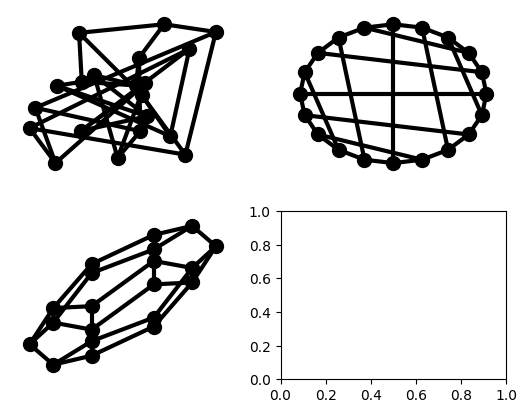

In [66]:
options = {
'node_color': 'black',
'node_size': 100,
'width': 3,
}
subax1 = plt.subplot(221)
nx.draw_random(G, **options)
subax2 = plt.subplot(222)
nx.draw_circular(G, **options)
subax3 = plt.subplot(223)
nx.draw_spectral(G, **options)
subax4 = plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,5), range(5)], **options)

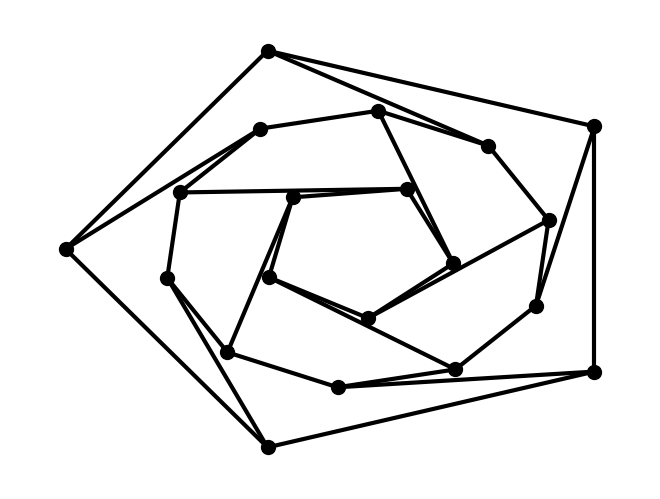

In [67]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)

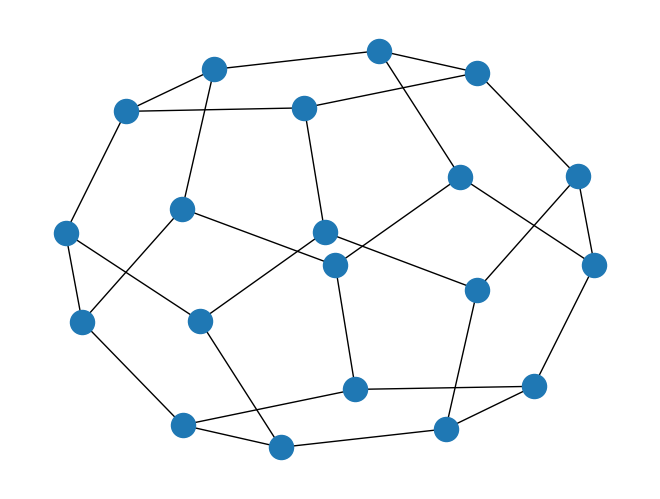

In [68]:
from networkx.drawing.nx_pydot import write_dot
pos = nx.nx_agraph.graphviz_layout(G)
nx.draw(G, pos=pos)
write_dot(G, 'file.dot')